# NCES Education Data - Quick Start Guide

This notebook demonstrates how to use the **NCESConnector** to access National Center for Education Statistics data.

**Data Systems:**
- **CCD:** Common Core of Data (public K-12 schools)
- **PSS:** Private School Universe Survey
- **IPEDS:** Integrated Postsecondary Education Data (colleges)

**Data Categories:**
- School directory & enrollment
- Demographics (race/ethnicity, gender)
- Performance (test scores, graduation rates)
- Finances (revenues, expenditures, per-pupil spending)

**API Provider:** Urban Institute Education Data Portal (no key required)

---

*© 2025 KR-Labs. Licensed under Apache-2.0.*

## 1. Setup and Import

In [18]:
from krl_data_connectors.education import NCESConnector
import pandas as pd

# Initialize connector
nces = NCESConnector()

print(" NCES connector initialized")
print(f"API Base URL: {nces.base_url}")

{"timestamp": "2025-10-20T16:23:29.123489Z", "level": "WARNING", "name": "NCESConnector", "message": "No API key provided", "source": {"file": "base_connector.py", "line": 72, "function": "__init__"}, "levelname": "WARNING", "taskName": "Task-51", "connector": "NCESConnector"}
{"timestamp": "2025-10-20T16:23:29.124281Z", "level": "INFO", "name": "NCESConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 79, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-51", "connector": "NCESConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 2592000, "has_api_key": false}
{"timestamp": "2025-10-20T16:23:29.124766Z", "level": "INFO", "name": "NCESConnector", "message": "NCESConnector initialized", "source": {"file": "nces_connector.py", "line": 133, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-51", "base_url": "https://educationdata.urban.org/api/v1", "api_access": "Public"}
✓ NCES connector initialized
API Base URL: https

## 2. Get State Schools

Retrieve school directory for a state.

In [19]:
# Get Rhode Island schools for 2023
ri_schools = nces.get_state_schools('RI', year=2023)

print(f"Retrieved {len(ri_schools)} schools")
if not ri_schools.empty:
    print("\nAvailable columns:", ri_schools.columns.tolist()[:15])
    print("\nSample data:")
    display(ri_schools.head())
    
    # Basic school type distribution
    if 'school_type' in ri_schools.columns:
        print("\nSchool Types:")
        print(ri_schools['school_type'].value_counts())


{"timestamp": "2025-10-20T16:23:29.137481Z", "level": "INFO", "name": "NCESConnector", "message": "Returning cached school data", "source": {"file": "nces_connector.py", "line": 253, "function": "_api_get_state_schools"}, "levelname": "INFO", "taskName": "Task-53", "state": "RI", "year": 2023}
Retrieved 320 schools

Available columns: ['year', 'ncessch', 'school_id', 'school_name', 'leaid', 'lea_name', 'state_leaid', 'seasch', 'street_mailing', 'city_mailing', 'state_mailing', 'zip_mailing', 'street_location', 'city_location', 'state_location']

Sample data:
Retrieved 320 schools

Available columns: ['year', 'ncessch', 'school_id', 'school_name', 'leaid', 'lea_name', 'state_leaid', 'seasch', 'street_mailing', 'city_mailing', 'state_mailing', 'zip_mailing', 'street_location', 'city_location', 'state_location']

Sample data:


,year,ncessch,school_id,school_name,leaid,lea_name,state_leaid,seasch,street_mailing,city_mailing,...,high_cedp,middle_cedp,ungrade_cedp,enrollment,state_leg_district_lower,state_leg_district_upper,ncessch_num,congress_district_id,direct_certification,lunch_program
0,2023,440000100380,4400380,R.I. School for the Deaf,4400001,R.I. Sch for the Deaf,RI-50,50-28702,One Corliss Park,Providence,...,1,1,0,76.0,44003,44001,440000100380,4401,22.0,1.0
1,2023,440000300121,4400121,Metropolitan Career Tech Ctr,4400003,MET Career and Tech,RI-60,60-28703,325 Public Street,Providence,...,1,0,0,791.0,44012,44006,440000300121,4401,268.0,2.0
2,2023,440000400379,4400379,Davies Career-Tech High School,4400004,Davies Career and Tech,RI-40,40-17701,50 Jenckes Hill Road,Lincoln,...,1,0,0,888.0,44044,44017,440000400379,4401,203.0,1.0
3,2023,440000500271,4400271,Urban Collaborative Program,4400005,Urban Collaborative,RI-49,49-28167,75 Carpenter Street,Providence,...,0,1,0,132.0,44008,44005,440000500271,4402,78.0,2.0
4,2023,440000600326,4400326,The Learning Community,4400006,Learning Community,RI-59,59-04601,21 Lincoln Avenue,Central Falls,...,0,1,0,571.0,44060,44016,440000600326,4401,246.0,1.0



School Types:
school_type
1    306
3     10
4      3
2      1
Name: count, dtype: int64


### Visualize School Distribution

Create visualizations of the school data.

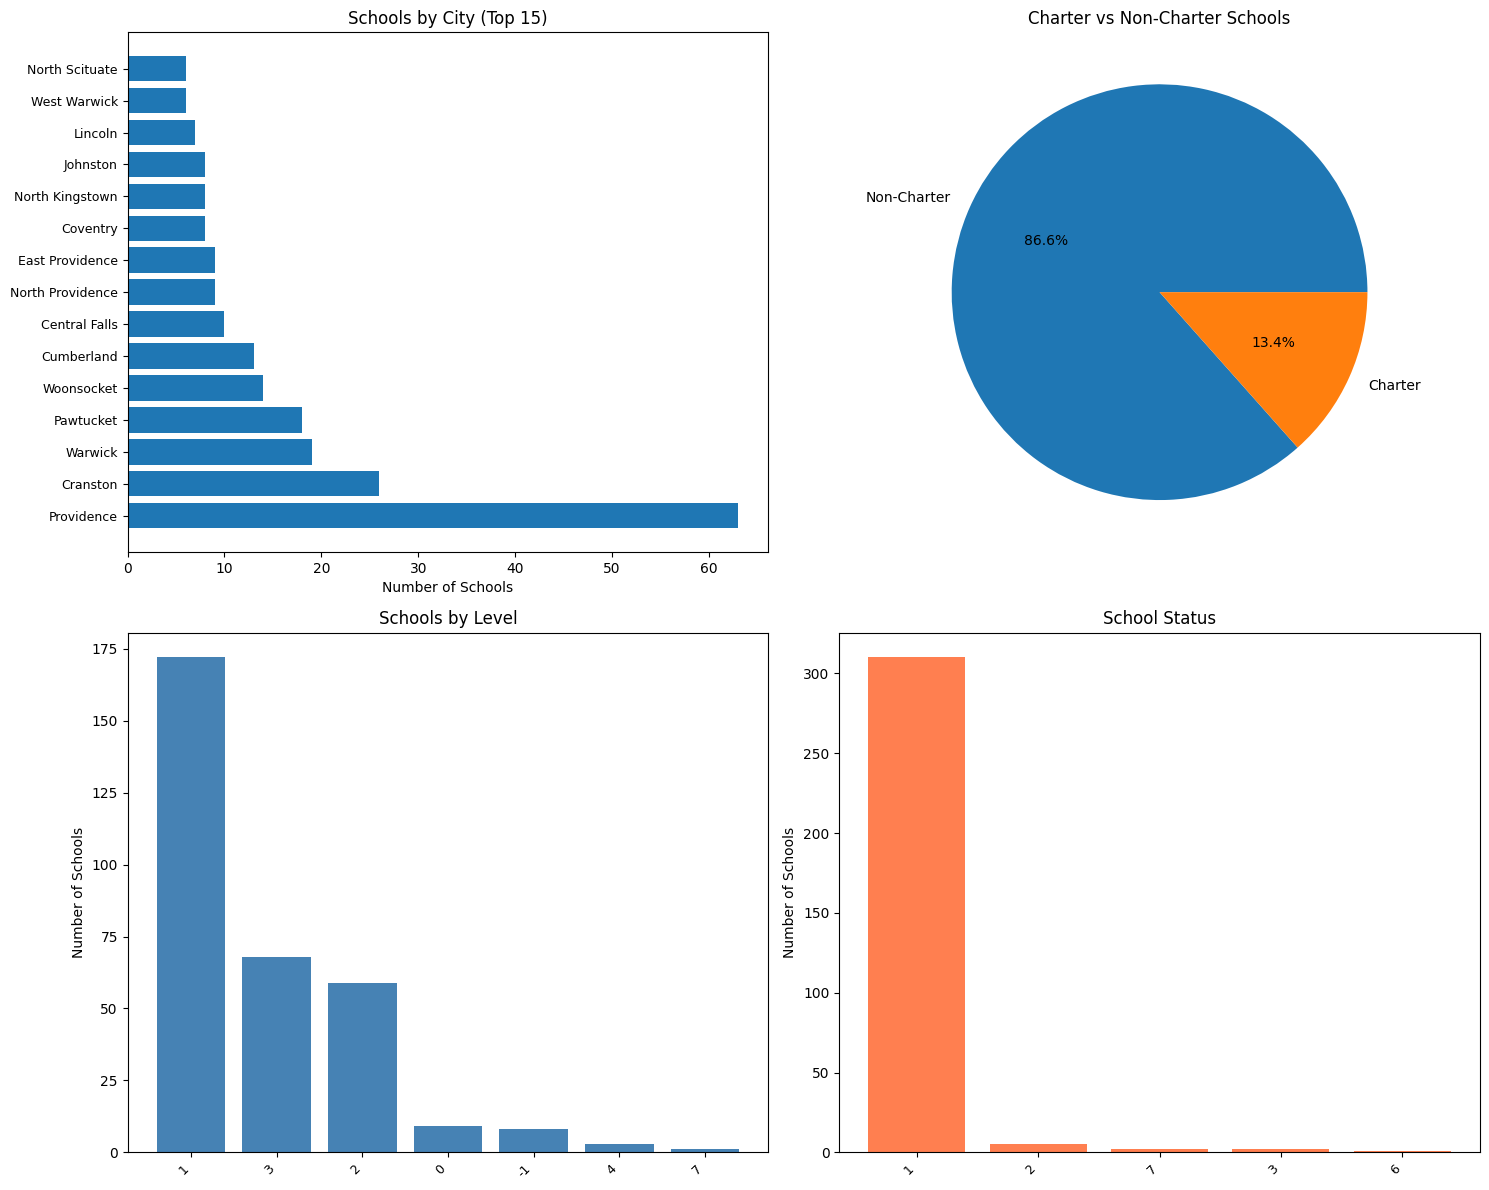


✓ Visualizations created for 320 schools


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

if not ri_schools.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Schools by City/Location
    if 'city_location' in ri_schools.columns:
        city_counts = ri_schools['city_location'].value_counts().head(15)
        axes[0, 0].barh(range(len(city_counts)), city_counts.values)
        axes[0, 0].set_yticks(range(len(city_counts)))
        axes[0, 0].set_yticklabels(city_counts.index, fontsize=9)
        axes[0, 0].set_xlabel('Number of Schools')
        axes[0, 0].set_title('Schools by City (Top 15)')
    
    # 2. Charter vs Non-Charter
    if 'charter' in ri_schools.columns:
        charter_counts = ri_schools['charter'].value_counts()
        axes[0, 1].pie(charter_counts.values, labels=['Non-Charter', 'Charter'], autopct='%1.1f%%')
        axes[0, 1].set_title('Charter vs Non-Charter Schools')
    
    # 3. School Level Distribution
    if 'school_level' in ri_schools.columns:
        level_counts = ri_schools['school_level'].value_counts()
        axes[1, 0].bar(range(len(level_counts)), level_counts.values, color='steelblue')
        axes[1, 0].set_xticks(range(len(level_counts)))
        axes[1, 0].set_xticklabels(level_counts.index, rotation=45, ha='right', fontsize=9)
        axes[1, 0].set_ylabel('Number of Schools')
        axes[1, 0].set_title('Schools by Level')
    
    # 4. Status Distribution
    if 'school_status' in ri_schools.columns:
        status_counts = ri_schools['school_status'].value_counts()
        axes[1, 1].bar(range(len(status_counts)), status_counts.values, color='coral')
        axes[1, 1].set_xticks(range(len(status_counts)))
        axes[1, 1].set_xticklabels(status_counts.index, rotation=45, ha='right', fontsize=9)
        axes[1, 1].set_ylabel('Number of Schools')
        axes[1, 1].set_title('School Status')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n Visualizations created for {len(ri_schools)} schools")
else:
    print("No school data to visualize")


## 3. Load School Data from File

Alternative: Load downloaded NCES data from CSV.

In [21]:
# If you have downloaded CCD files
# Download from: https://nces.ed.gov/ccd/files.asp

# school_file = "path/to/ccd_schools_2023.csv"
# schools = nces.load_school_data(school_file)
# print(f"Loaded {len(schools)} schools")

## 4. Get Enrollment Data

Retrieve enrollment statistics.

Retrieved enrollment for 320 schools/districts

Enrollment columns: ['enrollment']

Sample enrollment data:


,ncessch,school_name,leaid,lea_name,enrollment
0,440000100380,R.I. School for the Deaf,4400001,R.I. Sch for the Deaf,76.0
1,440000300121,Metropolitan Career Tech Ctr,4400003,MET Career and Tech,791.0
2,440000400379,Davies Career-Tech High School,4400004,Davies Career and Tech,888.0
3,440000500271,Urban Collaborative Program,4400005,Urban Collaborative,132.0
4,440000600326,The Learning Community,4400006,Learning Community,571.0


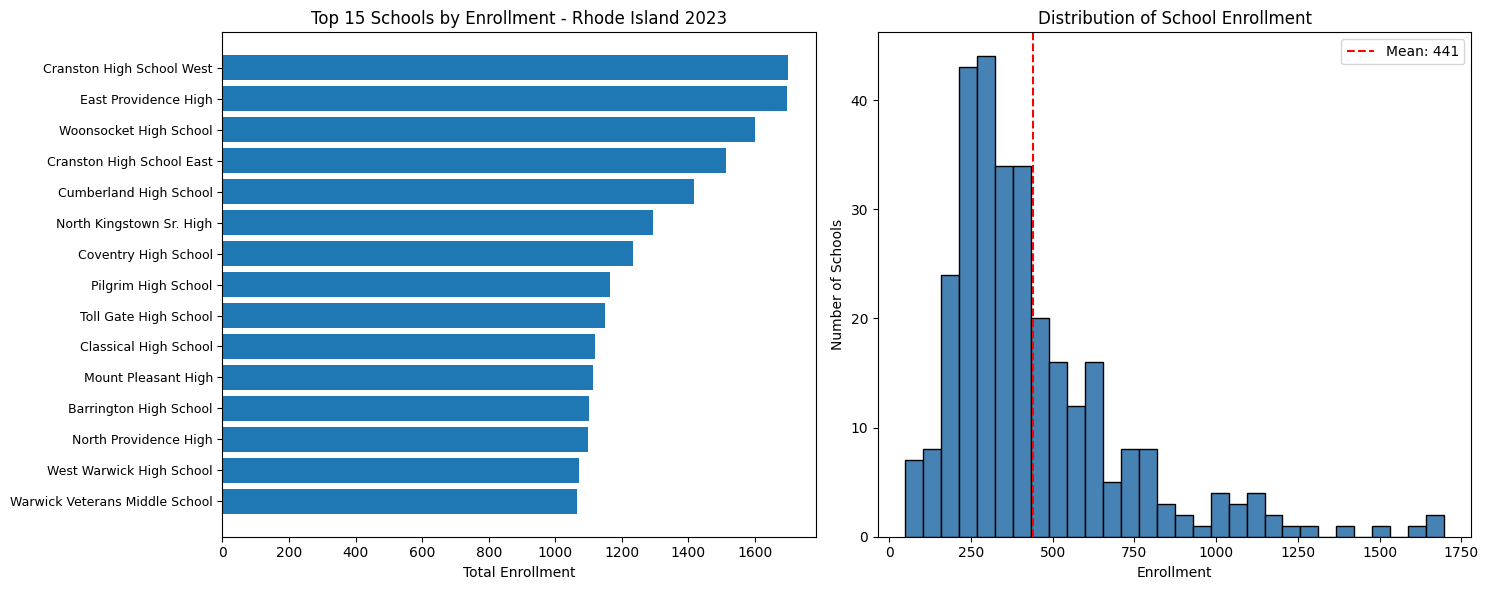


📊 Enrollment Statistics:
  Total schools with enrollment data: 305
  Average enrollment: 441
  Median enrollment: 361
  Largest school: 1698 students
  Smallest school: 48 students


In [22]:
# Get enrollment data for Rhode Island
enrollment = nces.get_enrollment_data('RI', year=2023)

if not enrollment.empty:
    print(f"Retrieved enrollment for {len(enrollment)} schools/districts")
    print("\nEnrollment columns:", [col for col in enrollment.columns if 'enrollment' in col.lower()][:10])
    print("\nSample enrollment data:")
    display(enrollment.head())
    
    # Visualize enrollment distribution
    if 'enrollment' in enrollment.columns:
        import matplotlib.pyplot as plt
        
        # Filter out NaN values and sort
        valid_enrollment = enrollment[enrollment['enrollment'].notna()].copy()
        top_schools = valid_enrollment.nlargest(15, 'enrollment')
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Top 15 schools by enrollment
        axes[0].barh(range(len(top_schools)), top_schools['enrollment'])
        axes[0].set_yticks(range(len(top_schools)))
        axes[0].set_yticklabels(top_schools['school_name'], fontsize=9)
        axes[0].set_xlabel('Total Enrollment')
        axes[0].set_title('Top 15 Schools by Enrollment - Rhode Island 2023')
        axes[0].invert_yaxis()
        
        # Enrollment distribution histogram
        axes[1].hist(valid_enrollment['enrollment'], bins=30, edgecolor='black', color='steelblue')
        axes[1].set_xlabel('Enrollment')
        axes[1].set_ylabel('Number of Schools')
        axes[1].set_title('Distribution of School Enrollment')
        axes[1].axvline(valid_enrollment['enrollment'].mean(), color='red', 
                       linestyle='--', label=f'Mean: {valid_enrollment["enrollment"].mean():.0f}')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n Enrollment Statistics:")
        print(f"  Total schools with enrollment data: {len(valid_enrollment)}")
        print(f"  Average enrollment: {valid_enrollment['enrollment'].mean():.0f}")
        print(f"  Median enrollment: {valid_enrollment['enrollment'].median():.0f}")
        print(f"  Largest school: {valid_enrollment['enrollment'].max():.0f} students")
        print(f"  Smallest school: {valid_enrollment['enrollment'].min():.0f} students")
else:
    print("No enrollment data available")


## 5. Extract Demographics

Analyze student demographics from school data.

In [23]:
# Extract demographic information
if not ri_schools.empty:
    demographics = nces.get_demographics(ri_schools)
    
    if not demographics.empty:
        print("Demographic Categories:")
        print(demographics.columns.tolist())
        print("\nSample demographics:")
        display(demographics.head())
    else:
        print("No demographic columns found in 2023 directory data")
        print("\nNote: Demographic data is available through CRDC (Civil Rights Data Collection)")
        print("CCD directory focuses on school characteristics and enrollment")
        
        # Show what IS available
        print("\nAvailable school characteristics:")
        char_cols = [col for col in ri_schools.columns if any(term in col.lower() for term in 
                     ['level', 'type', 'status', 'charter', 'magnet', 'title'])]
        if char_cols:
            for col in char_cols[:10]:
                print(f"  - {col}")
else:
    print("Load school data first to extract demographics")


{"timestamp": "2025-10-20T16:23:29.466810Z", "level": "INFO", "name": "NCESConnector", "message": "Extracted demographics", "source": {"file": "nces_connector.py", "line": 399, "function": "get_demographics"}, "levelname": "INFO", "taskName": "Task-61", "columns": 0}
No demographic columns found in 2023 directory data

Note: Demographic data is available through CRDC (Civil Rights Data Collection)
CCD directory focuses on school characteristics and enrollment

Available school characteristics:
  - school_level
  - school_type
  - school_status
  - title_i_status
  - title_i_eligible
  - title_i_schoolwide
  - charter
  - magnet
No demographic columns found in 2023 directory data

Note: Demographic data is available through CRDC (Civil Rights Data Collection)
CCD directory focuses on school characteristics and enrollment

Available school characteristics:
  - school_level
  - school_type
  - school_status
  - title_i_status
  - title_i_eligible
  - title_i_schoolwide
  - charter
  - mag

## 6. Get Graduation Rates

Retrieve graduation rate statistics.

Note: EDFacts graduation rates lag several years. Trying 2019...
{"timestamp": "2025-10-20T16:23:29.472710Z", "level": "INFO", "name": "NCESConnector", "message": "Fetching graduation rates", "source": {"file": "nces_connector.py", "line": 441, "function": "get_graduation_rates"}, "levelname": "INFO", "taskName": "Task-63", "state": "RI", "year": 2019}
{"timestamp": "2025-10-20T16:23:30.373125Z", "level": "INFO", "name": "NCESConnector", "message": "Graduation rates retrieved", "source": {"file": "nces_connector.py", "line": 452, "function": "get_graduation_rates"}, "levelname": "INFO", "taskName": "Task-63", "state": "RI", "year": 2019, "records": 646}
Retrieved graduation data: 646 records

Graduation rate columns: ['grad_rate_high', 'grad_rate_low', 'grad_rate_midpt']

Sample data:
{"timestamp": "2025-10-20T16:23:30.373125Z", "level": "INFO", "name": "NCESConnector", "message": "Graduation rates retrieved", "source": {"file": "nces_connector.py", "line": 452, "function": "get_gradua

,cohort_num,disability,econ_disadvantaged,fips,foster_care,grad_rate_high,grad_rate_low,grad_rate_midpt,homeless,lea_name,leaid,leaid_num,lep,ncessch,ncessch_num,race,school_name,year
0,3,99,99,44,99,NaN,NaN,-3,99,R.I. Sch for the Deaf,4400001,4400001,99,440000100380,440000100380,99,R.I. School for the Deaf,2019
1,1,1,99,44,99,NaN,NaN,-3,99,R.I. Sch for the Deaf,4400001,4400001,99,440000100380,440000100380,99,R.I. School for the Deaf,2019
2,2,99,1,44,99,NaN,NaN,-3,99,R.I. Sch for the Deaf,4400001,4400001,99,440000100380,440000100380,99,R.I. School for the Deaf,2019
3,1,99,99,44,99,NaN,NaN,-3,1,R.I. Sch for the Deaf,4400001,4400001,99,440000100380,440000100380,99,R.I. School for the Deaf,2019
4,1,99,99,44,99,NaN,NaN,-3,99,R.I. Sch for the Deaf,4400001,4400001,99,440000100380,440000100380,2,R.I. School for the Deaf,2019


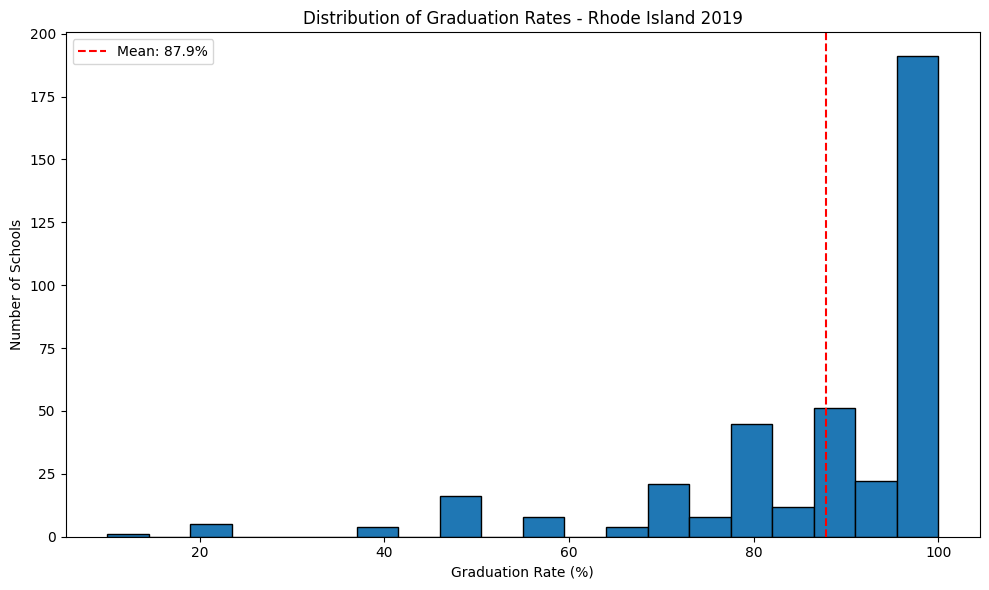

In [24]:
# Get graduation rates - use 2019 (EDFacts availability)
print("Note: EDFacts graduation rates lag several years. Trying 2019...")
grad_rates = nces.get_graduation_rates('RI', year=2019)

if not grad_rates.empty:
    print(f"Retrieved graduation data: {len(grad_rates)} records")
    print("\nGraduation rate columns:", [col for col in grad_rates.columns if 'rate' in col.lower()][:5])
    print("\nSample data:")
    display(grad_rates.head())
    
    # Visualize if rate column exists
    import matplotlib.pyplot as plt
    rate_col = next((col for col in grad_rates.columns if 'rate' in col.lower()), None)
    if rate_col:
        plt.figure(figsize=(10, 6))
        plt.hist(grad_rates[rate_col].dropna(), bins=20, edgecolor='black')
        plt.xlabel('Graduation Rate (%)')
        plt.ylabel('Number of Schools')
        plt.title('Distribution of Graduation Rates - Rhode Island 2019')
        plt.axvline(grad_rates[rate_col].mean(), color='red', linestyle='--', label=f'Mean: {grad_rates[rate_col].mean():.1f}%')
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print("No graduation rate data available for 2019")
    print("\nEDFacts graduation rates:")
    print("  - Available years: 2010-2019")
    print("  - 2020+: Not yet available in EDFacts")


## 7. Get District Finances

Analyze school district financial data.

In [25]:
# Get district finance data - use 2021 (most recent available)
print("Note: Finance data typically lags 2 years. Trying 2021...")
finances = nces.get_district_finance('RI', year=2021)

if not finances.empty:
    print(f"Retrieved finance data for {len(finances)} districts")
    print("\nFinancial data columns:", finances.columns.tolist()[:10])
    print("\nSample finance data:")
    display(finances.head())
    
    # Visualize revenues if available
    import matplotlib.pyplot as plt
    rev_col = next((col for col in finances.columns if 'revenue' in col.lower() and 'total' in col.lower()), None)
    if rev_col and len(finances) > 0:
        plt.figure(figsize=(12, 6))
        top_districts = finances.nlargest(10, rev_col)
        plt.barh(range(len(top_districts)), top_districts[rev_col]/1000000)  # Convert to millions
        plt.yticks(range(len(top_districts)), top_districts.get('lea_name', top_districts.index))
        plt.xlabel('Total Revenue ($ Millions)')
        plt.title('Top 10 Districts by Revenue - Rhode Island 2021')
        plt.tight_layout()
        plt.show()
else:
    print("No finance data available for 2021")
    print("Finance data availability:")
    print("  - 2021: Most recent complete data")
    print("  - 2022-2023: Not yet released")


Note: Finance data typically lags 2 years. Trying 2021...
{"timestamp": "2025-10-20T16:23:30.452824Z", "level": "INFO", "name": "NCESConnector", "message": "Fetching district finances", "source": {"file": "nces_connector.py", "line": 496, "function": "get_district_finance"}, "levelname": "INFO", "taskName": "Task-65", "state": "RI", "year": 2021}
{"timestamp": "2025-10-20T16:23:31.179021Z", "level": "INFO", "name": "NCESConnector", "message": "District finances retrieved", "source": {"file": "nces_connector.py", "line": 507, "function": "get_district_finance"}, "levelname": "INFO", "taskName": "Task-65", "state": "RI", "year": 2021, "districts": 0}
No finance data available for 2021
Finance data availability:
  - 2021: Most recent complete data
  - 2022-2023: Not yet released
{"timestamp": "2025-10-20T16:23:31.179021Z", "level": "INFO", "name": "NCESConnector", "message": "District finances retrieved", "source": {"file": "nces_connector.py", "line": 507, "function": "get_district_finan

## 8. Calculate Per-Pupil Spending

Compute spending per student by district.

In [26]:
# Calculate per-pupil spending
if not finances.empty and not enrollment.empty:
    per_pupil = nces.calculate_per_pupil_spending(finances, enrollment)
    
    if not per_pupil.empty and 'per_pupil_spending' in per_pupil.columns:
        print("Per-Pupil Spending by District:")
        print(per_pupil[['leaid', 'total_expenditures', 'enrollment', 
                         'per_pupil_spending']].head())
        
        print(f"\nAverage per-pupil spending: ${per_pupil['per_pupil_spending'].mean():.2f}")
    else:
        print("Unable to calculate per-pupil spending (missing columns)")
else:
    print("Example per-pupil calculation:")
    print("Total expenditures: $50,000,000")
    print("Total enrollment: 10,000")
    print(f"Per-pupil spending: ${50000000/10000:.2f}")

Example per-pupil calculation:
Total expenditures: $50,000,000
Total enrollment: 10,000
Per-pupil spending: $5000.00


## 9. Compare Districts

Compare metrics across districts.

In [27]:
# Compare districts by enrollment
district_enrollment = nces.compare_districts('RI', 2023, metric='enrollment')

if not district_enrollment.empty:
    print("District Comparison (Enrollment):")
    if 'enrollment' in district_enrollment.columns:
        top_districts = district_enrollment.nlargest(5, 'enrollment')
        print(top_districts[['leaid', 'enrollment']])
    else:
        print(district_enrollment.head())
else:
    print("No district data available for comparison")

{"timestamp": "2025-10-20T16:23:31.192390Z", "level": "INFO", "name": "NCESConnector", "message": "Compared districts", "source": {"file": "nces_connector.py", "line": 592, "function": "compare_districts"}, "levelname": "INFO", "taskName": "Task-69", "state": "RI", "year": 2023, "metric": "enrollment"}
District Comparison (Enrollment):
       leaid  enrollment
85   4400240      1698.0
124  4400330      1697.0
313  4401200      1599.0
84   4400240      1513.0
110  4400270      1418.0
District Comparison (Enrollment):
       leaid  enrollment
85   4400240      1698.0
124  4400330      1697.0
313  4401200      1599.0
84   4400240      1513.0
110  4400270      1418.0


## 10. Extract Performance Metrics

Analyze school performance data.

{"timestamp": "2025-10-20T16:23:31.201132Z", "level": "INFO", "name": "NCESConnector", "message": "Extracted performance metrics", "source": {"file": "nces_connector.py", "line": 627, "function": "get_school_performance"}, "levelname": "INFO", "taskName": "Task-71", "columns": 0}
No performance metrics found in CCD directory data

Note: Performance data (test scores, proficiency) comes from EDFacts
CCD directory provides school/district characteristics
No performance metrics found in CCD directory data

Note: Performance data (test scores, proficiency) comes from EDFacts
CCD directory provides school/district characteristics


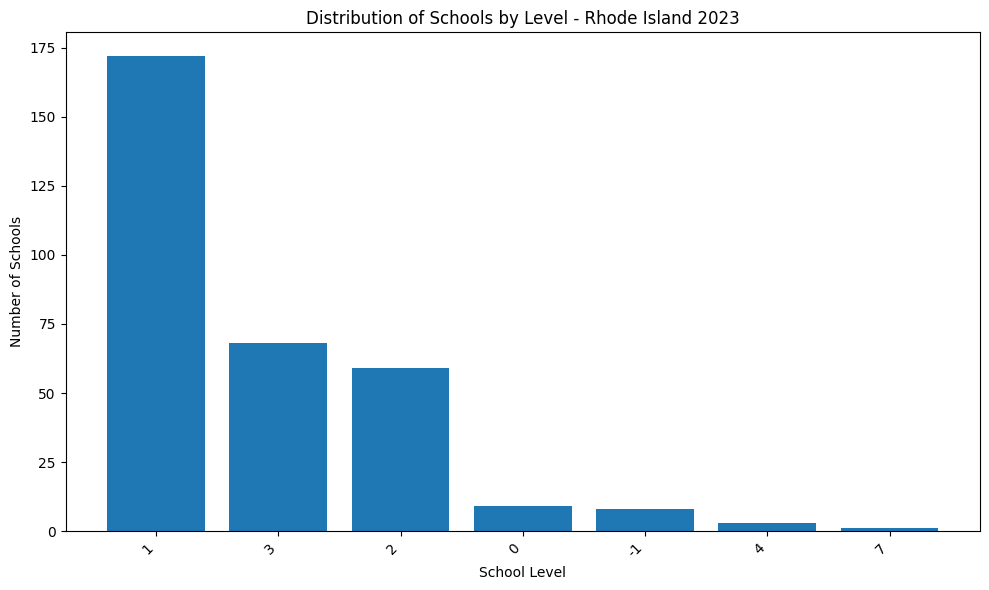


For test scores and proficiency rates, use:
  - EDFacts assessments endpoint
  - State education department APIs


In [28]:
# Get school performance metrics
if not ri_schools.empty:
    performance = nces.get_school_performance(ri_schools)
    
    if not performance.empty:
        print("Performance Metrics:")
        print(performance.columns.tolist())
        print("\nSample performance data:")
        display(performance.head())
    else:
        print("No performance metrics found in CCD directory data")
        print("\nNote: Performance data (test scores, proficiency) comes from EDFacts")
        print("CCD directory provides school/district characteristics")
        
        # Create a simple visualization of school level distribution
        import matplotlib.pyplot as plt
        if 'school_level' in ri_schools.columns:
            plt.figure(figsize=(10, 6))
            level_counts = ri_schools['school_level'].value_counts()
            plt.bar(range(len(level_counts)), level_counts.values)
            plt.xticks(range(len(level_counts)), level_counts.index, rotation=45, ha='right')
            plt.ylabel('Number of Schools')
            plt.xlabel('School Level')
            plt.title('Distribution of Schools by Level - Rhode Island 2023')
            plt.tight_layout()
            plt.show()
        
        print("\nFor test scores and proficiency rates, use:")
        print("  - EDFacts assessments endpoint")
        print("  - State education department APIs")


## 11. School Type Analysis

Examine different school types.

In [29]:
# Show school type definitions
print("School Type Classifications:")
for code, description in nces.school_types.items():
    print(f"  {code}: {description}")

# If school data has type codes
if not ri_schools.empty and 'school_type' in ri_schools.columns:
    print("\nSchool Type Distribution:")
    print(ri_schools['school_type'].value_counts())

School Type Classifications:
  1: Regular school
  2: Special education school
  3: Vocational school
  4: Alternative/other school

School Type Distribution:
school_type
1    306
3     10
4      3
2      1
Name: count, dtype: int64


## 12. Export Results

Save education data for further analysis.

In [30]:
# Export school directory
if not ri_schools.empty:
    nces.export_to_csv(ri_schools, 'ri_schools_2023.csv')
    print(" School directory exported")

# Export demographics
if not ri_schools.empty:
    demographics = nces.get_demographics(ri_schools)
    if not demographics.empty:
        nces.export_to_csv(demographics, 'ri_school_demographics.csv')
        print(" Demographics exported")

# Export per-pupil spending
if not finances.empty and not enrollment.empty:
    per_pupil = nces.calculate_per_pupil_spending(finances, enrollment)
    if not per_pupil.empty:
        nces.export_to_csv(per_pupil, 'ri_per_pupil_spending.csv')
        print(" Per-pupil spending exported")

{"timestamp": "2025-10-20T16:23:31.265029Z", "level": "INFO", "name": "NCESConnector", "message": "Exported to CSV", "source": {"file": "nces_connector.py", "line": 643, "function": "export_to_csv"}, "levelname": "INFO", "taskName": "Task-75", "filepath": "ri_schools_2023.csv", "rows": 320}
✓ School directory exported
{"timestamp": "2025-10-20T16:23:31.265667Z", "level": "INFO", "name": "NCESConnector", "message": "Extracted demographics", "source": {"file": "nces_connector.py", "line": 399, "function": "get_demographics"}, "levelname": "INFO", "taskName": "Task-75", "columns": 0}
✓ School directory exported
{"timestamp": "2025-10-20T16:23:31.265667Z", "level": "INFO", "name": "NCESConnector", "message": "Extracted demographics", "source": {"file": "nces_connector.py", "line": 399, "function": "get_demographics"}, "levelname": "INFO", "taskName": "Task-75", "columns": 0}


## Next Steps

**Explore More:**
- Private school data (PSS)
- College/university data (IPEDS)
- National Assessment of Educational Progress (NAEP) scores
- Teacher demographics and qualifications
- Special education programs
- Chronic absenteeism rates

**Resources:**
- [NCES Data Tools](https://nces.ed.gov/datatools/)
- [Urban Institute Education Data Portal](https://educationdata.urban.org/)
- [CCD Documentation](https://nces.ed.gov/ccd/)
- [IPEDS Documentation](https://nces.ed.gov/ipeds/)

**Analysis Ideas:**
- Achievement gap analysis by demographics
- Resource equity across districts
- School choice and charter school impact
- College readiness trends
- Teacher retention patterns
- School funding adequacy studies